In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

#  二维数据压缩

读入二维数据

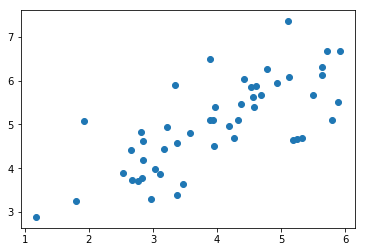

(50, 2)


0.816496580927726

In [2]:
data = sio.loadmat('data/ex7data1.mat')
X = data.get('X')
plt.scatter(X[:, 0], X[:, 1])
plt.show()
print(X.shape)
a = np.array([1,2,3])
np.std(a)


定义相关函数

In [3]:
def normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    return (X-mu)/sigma

In [4]:
def pca(X):      
    Sigma = np.dot(X.T,X) / X.shape[0]
    U, S, V = np.linalg.svd(Sigma)
    return U,S,V

In [5]:
#进行压缩
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)
#压缩重现
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)
#计算压缩偏差
def get_dev(S,k):
    dev = np.sum(S[:k,])/np.sum(S)
    print('k=',k,';dev=',dev)
    return dev

运算并可视化

k= 1 ;dev= 0.8677651881696647


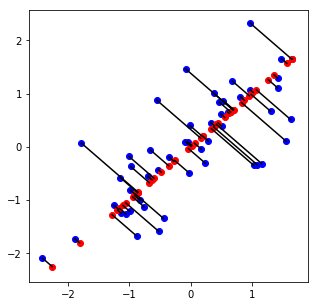

In [6]:
X = normalize(X)
U,S,V = pca(X)
Z = project_data(X, U, 1)
X_recovered = recover_data(Z, U, 1)
Z_0 = np.zeros_like(Z)
dev = get_dev(S,1)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1],c = 'B',marker='o')
plt.scatter(X_recovered[:, 0], X_recovered[:, 1],c = 'R',marker='o')
for i in range(X.shape[0]):
    plt.plot([X[i][0],X_recovered[i][0]],[X[i][1],X_recovered[i][1]],color = 'black')
#plt.scatter(Z,Z_0,c='g',marker='+')
plt.show()

# 压缩人脸数据

(5000, 1024)


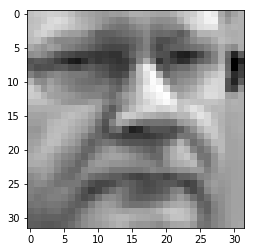

In [7]:
X2 = sio.loadmat('./data/ex7faces.mat')
X2 = X2['X']
print(X2.shape)
face = np.array([x.reshape((32, 32)).T for x in X2])
plt.imshow(face[5],cmap='gray')
plt.show()

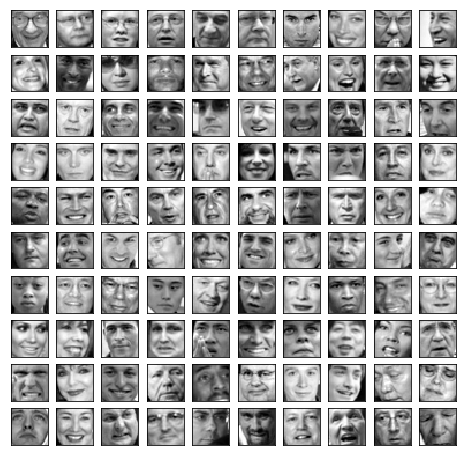

In [8]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    grid_size = int(np.sqrt(n))
    
    first_n_images = X[:n,:,:]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c],cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

plot_n_image(face, n=100)


k= 100 ;dev= 0.9434273519364477


<function matplotlib.pyplot.show>

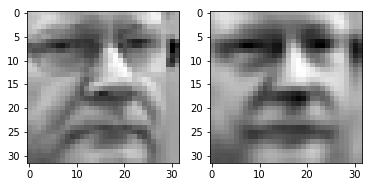

In [9]:
U, S, V = pca(X2)
Z = project_data(X2, U, 100)
dev = get_dev(S,100)
X_recovered = recover_data(Z, U, 100)
face_recovered = np.array([x.reshape((32, 32)).T for x in X_recovered])

#查看原数据与压缩后恢复数据的图片
plt.subplot(1,2,1)
plt.imshow(face[5],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(face_recovered[5],cmap='gray')
plt.show

In [10]:
#计算不同k值时的偏差
for i in range(500):
    dev = get_dev(S,i)

k= 0 ;dev= 0.0
k= 1 ;dev= 0.2560444375722909
k= 2 ;dev= 0.43795368734152074
k= 3 ;dev= 0.5529735314575751
k= 4 ;dev= 0.6049091941663242
k= 5 ;dev= 0.6365198646691463
k= 6 ;dev= 0.6644056708234034
k= 7 ;dev= 0.6827486333752432
k= 8 ;dev= 0.6982407474167471
k= 9 ;dev= 0.7116511633687689
k= 10 ;dev= 0.7248279338953741
k= 11 ;dev= 0.7355692700251398
k= 12 ;dev= 0.7462322725535269
k= 13 ;dev= 0.7557592225014351
k= 14 ;dev= 0.7633232653314782
k= 15 ;dev= 0.7702680455262954
k= 16 ;dev= 0.7767304522443405
k= 17 ;dev= 0.7831260963798676
k= 18 ;dev= 0.7888560254052521
k= 19 ;dev= 0.7945299217135982
k= 20 ;dev= 0.7997071139590871
k= 21 ;dev= 0.8043451372052374
k= 22 ;dev= 0.8089403272836745
k= 23 ;dev= 0.8134721524229752
k= 24 ;dev= 0.8177692043085185
k= 25 ;dev= 0.8219162635925554
k= 26 ;dev= 0.8259458255377797
k= 27 ;dev= 0.8298483515605001
k= 28 ;dev= 0.8335320911511027
k= 29 ;dev= 0.8370823769699078
k= 30 ;dev= 0.8406202663778586
k= 31 ;dev= 0.8439316210249683
k= 32 ;dev= 0.8471966175108154
k